## Downloading the Web page for web scraping

In [1]:
import requests 
#The requests library will make a GET request to a web server, which will download the HTML contents of a given web page for us.

In [2]:
page = requests.get("https://www.worldometers.info/coronavirus")

In [3]:
page.status_code
#  A status_code of 200 means that the page downloaded successfully. A status code starting with a 2 generally indicates success

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
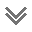

In [4]:
page.content

## HTML Parsing
Parsing simply means breaking up sentence structure into components under the direction of grammar. So, ‘HTML parsing’ means taking in HTML code and extracting relevant information from its various tags. A computer program that parses content is called a parser. We will be using ‘BeautifulSoup’ library.

Here, the ‘lxml’ parser was used since it works with broken html and widely used.

In [5]:
#importing the BeautifulSoup library
from bs4 import BeautifulSoup

#Initiating the BeautifulSoup Class
#Where soup is a variable containing the HTML of the webpage
soup = BeautifulSoup(page.content, 'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
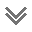

In [6]:
#Lets format it nicely, using the prettify method as contrasts as cell 3
print(soup.prettify())


## Extraction of Table
"table id="main_table_countries_today" class="table table-bordered table-hover main_table_countries dataTable no-footer" style="width: 100%; margin-top: 0px !important;"

Succeeding the inspection, the attributes — ‘id’ was identified and will be use to filter the HTML document to get the required table elements.

In [7]:
table = soup.find('table', attrs={'id' : "main_table_countries_today"})
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## Getting text out of the extracted table
tag td ,tr and th represents table column, table rows and table headers respectively.

In [43]:
rows = table.find_all("tr", attrs={"style": ""})

bs4.element.ResultSet

In [117]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:22])
        
    else:
        data.append(item.text.strip().split("\n")[:21])

In [118]:
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop'],
 ['World',
  '298,409,911',
  '+259,043',
  '5,484,286',
  '+2,233',
  '256,929,159',
  '+133,960',
  '35,996,466',
  '91,893',
  '38,283',
  '703.6',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '58,805,186',
  '',
  '853,612 ',
  '',
  '41,999,896',
  '',
  '15,951,678',
  '20,938',
  '176,098',
  '2,556',
  '826,586,018',
  '2,475,292',
  '333,934,783 ',
  'North America',
  '63910',
  '',
  '',
  '47,769'],
 ['2',
  'India',
  '35,109,286',
  '',
  '482,876 ',
  '',
  '34,342,255',
  '',
  '284,155',
  '8,944',
  '25,069',
  '345',
  '685,305,751',
  '489,331',
  '1,400,494

## Converting to a Dask dataframe
The next step is to convert the list into a Dask dataframe to enable data manipulation and cleaning. As pointed earlier on. since the data is increasing daily, it is advisable to use a Dask dataframe which handles big data more efficiently.

In [120]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import dask.dataframe as dd

dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:20]) #Formatting the header
df = dd.from_pandas(dt,npartitions=1)
#pd.set_option("display.max_rows", None, "display.max_columns", None)


In [121]:
df.head(10)

# Country,Other  TotalCases   NewCases TotalDeaths    NewDeaths  \
0  World   298,409,911    +259,043  5,484,286      +2,233  256,929,159   
1      1           USA  58,805,186               853,612                 
2      2         India  35,109,286               482,876                 
3      3        Brazil  22,351,104               619,559                 
4      4            UK  13,835,334               149,284                 
5      5        France  10,921,757               124,809                 
6      6        Russia  10,601,300    +15,316    313,817          +802   
7      7        Turkey   9,718,861                83,075                 
8      8       Germany   7,342,216               113,902                 
9      9         Spain   6,922,466                89,837                 

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +133,960   35,996,466      91,893           38,283            703.6   
1     41,999,896               15,951,678           20,938          176,098   
2     34,342,255                  284,155            8,944           25,069   
3     21,567,845                  163,700            8,318          104,035   
4     10,567,672                3,118,378              911          202,198   
5      8,335,903                2,461,045            3,333          166,765   
6      9,623,677      +22,949     663,806            2,300           72,597   
7      9,192,167                  443,619            1,128          113,393   
8      6,626,500      +44,700     601,814            4,636           87,211   
9      5,124,221                1,708,408            2,005          147,972   

  Deaths/1M pop   TotalTests     Tests/          1M pop                 \
0                                                   All           None   
1         2,556  826,586,018  2,475,292    333,934,783   North America   
2           345  685,305,751    489,331  1,400,494,834            Asia   
3         2,884   63,776,166    296,852    214,841,765   South America   
4         2,182  414,403,831  6,056,346     68,424,733          Europe   
5         1,906  188,795,159  2,882,732     65,491,742          Europe   
6         2,149  242,300,000  1,659,259    146,029,016          Europe   
7           969  120,595,094  1,407,020     85,709,562            Asia   
8         1,353   89,622,218  1,064,540     84,188,702          Europe   
9         1,920   66,213,858  1,415,366     46,782,142          Europe   

  Population Continent 1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl  \
0       None      None                                               None     
1      63910                                                                  
2   402,9002                                                                  
3     103473                                                                  
4      54580                                                                  
5      65250                                                                  
6     144651       105                                                  5     
7    91,0321                                                                  
8     117391                                                                  
9      75211                                                                  

  New Cases/1M pop  
0             None  
1           47,769  
2              203  
3              762  
4           45,574  
5           37,578  
6            4,546  
7            5,176  
8            7,148  
9           36,518

In [116]:
df.to_csv('../Extracted_data/data-*.csv')


['c:/Gateway/Data Analyst/Git/Extracted_data/data-0.csv']